# **MILESTONE 2 - PHASE 1**

Nama : Krisbiantoro Prabowo

Batch : 008
<hr>

## **1. Description**
### 1.1 Objective
- Mampu membuat berbagai `model regression` yang memprediksi harga sebuah mobil bekas pada wilayah Turki dan memilih salah satu diantaranya untuk dijadikan sebagai acuan utama saat memprediksi sebuah harga mobil bekas melalui input/masukkan user melalui website pada pengembangan selanjutnya

### 1.2 Problem Statements

- Diberikan sebuah dataset berupa daftar penjualan mobil bekas sepanjang tahun 2021 melalui website arabam.com. Dari dataset tersebut buatlah sebuah model regressi yang nantinya mampu memprediksi harga mobil bekas dari parameter-parameter yang telah dicantumkan. Nantinya diharapkan model ini dapat dijadikan sebuah referensi ataupun acuan baik kepada calon penjual ataupun pembeli untuk mengetahui harga mobil barang bekas dengan spesifikasi yang mereka inginkan

Situs Milestone heroku: https://krisbiantoro-batch8-ml2.herokuapp.com/
<hr>

## **2. Import Libraries**

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pickle

pd.options.mode.chained_assignment = None

In [123]:
colors = sns.color_palette("Set2")
colors2 = sns.color_palette("Paired")
sns.set_style("whitegrid")


## **3. Data Loading**

### 3.1. Loading Dataset

In [124]:
df = pd.read_csv('arabamcom_clean.csv')

In [125]:
df

,brand,model,age,fuel_type,gear_type,engine_capacity,engine_power,km,changed_parts,painted_parts,price
0,Renault,Fluence,8,Dizel,Otomatik,1500,110,217000,0,4,128000
1,Opel,Corsa,8,Dizel,Manuel,1200,75,108000,2,2,90000
2,Mercedes,E,8,Dizel,Otomatik,3000,265,155000,1,1,450000
3,Ford,Focus,9,Dizel,Manuel,1600,110,98420,0,0,130500
4,Toyota,Corolla,3,Benzin,Manuel,1300,99,78000,0,1,154000
...,...,...,...,...,...,...,...,...,...,...,...
2309,Hyundai,Accent,5,Dizel,Otomatik,1600,75,27550,0,0,145750
2310,Renault,Clio,1,Dizel,Manuel,1500,122,17000,0,1,271500
2311,Dacia,Sandero,1,Dizel,Manuel,1500,120,81500,0,0,186500
2312,Toyota,Corolla,0,Benzin,Otomatik,1800,112,15285,0,0,145900


### 3.2. Rename Columns

- Untuk lebih memudahkan dalam pengerjaan, seluruh nama kolom yang memiliki spasi diubah menjadi underscore(_) dan keseluruhan nama kolom menjadi lowercase

In [126]:
df.columns = [str(x).lower() for x in df.columns]

In [127]:
df.rename(columns={'fuel type':'fuel_type','gear type':'gear_type','engine capacity':'engine_capacity','engine power':'engine_power','changed parts':'changed_parts','painted parts':'painted_parts', 'price(turkish liras)':'price'}, inplace=True)

## **4. Exploratory Data Analysis**

### 4.1. Brief Information

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            2314 non-null   object
 1   model            2314 non-null   object
 2   age              2314 non-null   int64 
 3   fuel_type        2314 non-null   object
 4   gear_type        2314 non-null   object
 5   engine_capacity  2314 non-null   int64 
 6   engine_power     2314 non-null   int64 
 7   km               2314 non-null   int64 
 8   changed_parts    2314 non-null   int64 
 9   painted_parts    2314 non-null   int64 
 10  price            2314 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 199.0+ KB


- Tidak ditemukannya missing value dari tiap kolom pada dataset ini

In [129]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'engine_capacity', 'engine_power', 'km', 'changed_parts', 'painted_parts', 'price']
Categorical Columns:  ['brand', 'model', 'fuel_type', 'gear_type']


- Terdapat hingga 7 kolom numerik dimana salah satunya, yaitu kolom `price` akan menjadi kolom target/label
- Terdapat 4 kolom kategorik dimana bisa dipastikan bahwa kolom `brand` maupun `model` akan memiliki tingkat kardinalitas yang tinggi, karena kolom ini menyimpan nama merek mobil dan juga model dari tiap merek-merek tersebut

### 4.2. Statistical Descriptive

In [130]:
df.describe()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts,price
count,2314.000000,2314.000000,2314.000000,2314.000000,2314.000000,2314.000000,2.314000e+03
mean,7.012100,1487.899741,110.096802,121193.769231,0.315471,1.125756,1.745757e+05
std,6.106762,283.804973,33.485169,83891.614042,0.755927,1.992030,1.735131e+05
min,0.000000,900.000000,57.000000,0.000000,0.000000,0.000000,1.175000e+04
25%,3.000000,1400.000000,90.000000,57000.000000,0.000000,0.000000,1.025625e+05
50%,5.000000,1500.000000,105.000000,106000.000000,0.000000,0.000000,1.416250e+05
75%,9.000000,1600.000000,120.000000,174000.000000,0.000000,2.000000,1.930000e+05
max,46.000000,5500.000000,463.000000,488000.000000,6.000000,12.000000,5.050000e+06


- Tampaknya keseluruhan kolom akan memiliki outlier saat melakukan pendeteksian, Namun terdapat satu kolom yang sepertinya akan memiliki perlakuan khusus yaitu kolom `changed_parts`. Kolom ini berisi informasi berapa jumlah bagian mobil yang telah diganti oleh pemilik sebelumnya dan terlihat setelah dari Q3, baru terdapat data mobil yang telah diganti bagian-bagiannya. Sehingga angka-angka yang terdapat pada Q3-Q4 akan dimungkinkan berubah menjadi 0 karena hasil pendeteksian dari nilai outlier
- Oleh karena itu, pada kolom ini tidak akan dilakukan trimming ataupun capping terlepas berapapun persentase outliernya.

In [131]:
desc = df.describe()
desc.iloc[1:] = desc.iloc[1:].applymap('{:.2f}'.format)

print(desc.loc[:,'price'])

count        2314.0
mean      174575.74
std       173513.09
min        11750.00
25%       102562.50
50%       141625.00
75%       193000.00
max      5050000.00
Name: price, dtype: object


In [132]:
skewness = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})
skewness.reset_index(drop=True, inplace=True)

In [133]:
skewness['status'] = np.where(skewness['skew'].abs()>0.15, 'Skewed', 'Normal')
skewness

,columns,skew,status
0,age,1.522297,Skewed
1,engine_capacity,4.671562,Skewed
2,engine_power,3.231640,Skewed
3,km,0.785513,Skewed
4,changed_parts,3.005731,Skewed
5,painted_parts,2.240202,Skewed
6,price,12.740844,Skewed


- Keseluruhan kolom bersifat skewed, namun dikarenakan kita akan menggunakan metode `linear regression` maka teknik scaling yang akan dilakukan tetaplah `standard scaler`
- Ini dikarenakan linear regression cukup optimal untuk dijalankan dengan menggunakan angka numerik hasil dari standard scaler

### 4.3. Columns Analysis

In [134]:
df.corr()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts,price
age,1.000000,0.231056,-0.051926,0.468833,0.189106,0.243964,-0.212250
engine_capacity,0.231056,1.000000,0.235699,0.165165,0.040170,0.038865,0.052689
engine_power,-0.051926,0.235699,1.000000,-0.020563,-0.034257,-0.023425,0.653971
km,0.468833,0.165165,-0.020563,1.000000,0.151118,0.173662,-0.314978
changed_parts,0.189106,0.040170,-0.034257,0.151118,1.000000,0.349470,-0.075628
painted_parts,0.243964,0.038865,-0.023425,0.173662,0.349470,1.000000,-0.085637
price,-0.212250,0.052689,0.653971,-0.314978,-0.075628,-0.085637,1.000000


In [135]:
df_cor=df.corr()
for i in df_cor:
    j=0
    df_cor[i] = np.where(df_cor[i].abs()>0.1, df_cor[i], 'low')


In [136]:
for i in df_cor:
    print(f'Column: {i}')
    low_corr = df_cor[i][(df_cor[i] == "low")].value_counts().tolist()
    if low_corr:
        print('low:',low_corr)
    else:
        print('low:',0)
    print("="*20)

Column: age
low: [1]
Column: engine_capacity
low: [3]
Column: engine_power
low: [4]
Column: km
low: [1]
Column: changed_parts
low: [3]
Column: painted_parts
low: [3]
Column: price
low: [3]


- Nilai relasi antar kolom bervariasi, dimana terdapat kolom yang hanya memiliki sedikit nilai relasi rendah terhadap kolom lain yaitu `age` dan `km` dan terdapat kolom yang memiliki banyak relasi rendah terhadap kolom lain yaitu `engine_power`
- Untuk kolom `price` sebagai target terlihat `age, km, dan engine_power` memiliki relasi cukup tinggi dengan kolom ini. Jika ingin dihubungkan sangatlah wajar mobil yang telah berumur dan memiliki angka kilometer yang sudah tinggi akan memiliki harga cenderung lebih rendah jika dibandingkan dengan model yang sama karena angka dalam kolom ini akan menentukan dari pihak pembeli apakah sekiranya mereka akan sering melakukan servis terhadap mobil yang akan mereka beli jika angka-angka pada kolom ini sudah sangat tinggi. Kemudian pada kolom `engine power`, cenderung mobil yang memiliki `engine power` tinggi juga umumnya memiliki harga dasar yang mahal sehingga saat dijualpun masih memiliki harga yang tinggi jika semata-mata dibandingkan mobil dengan `engine power` yang rendah

In [137]:
for i in cat_columns:
    print(f'Cat Columns: {i}')
    print(f'{df[i].nunique()}')
    print('='*20)

Cat Columns: brand
32
Cat Columns: model
158
Cat Columns: fuel_type
2
Cat Columns: gear_type
2


- Kolom `brand` maupun `model` jelas memiliki tingkat kardinalitas yang tinggi
- Ini dikarenakan kedua kolom ini menyimpan baik merek mobil maupun model dari tiap-tiap merek mobil tersebut
- Namun penanganan yang akan kita lakukan terhadap kolom ini hanyalah sebatas mengurutkannya dari daftar mobil dengan merek ataupun model yang banyak terdaftar dalam list penjualan dari dataset ini khususnya pada data Train
- Hal ini dimaksudkan karena merek ataupun model mobil yang cenderung banyak dijual di pasaran bisa saja cenderung akan memiliki harga jual yang tidak terlalu jatuh dari harga awalnya atau istilah lainnya akan menjadi bias/favorit dari pembeli. Meskipun terdapat faktor mobil tersebut banyak dijual karena mungkin merek/model mobil ternyata rewel atau gampang rusak sehingga mereka lebih memilih untuk menjualnya. Dari berbagai asumsi yang telah disebutkan, kita akan memilih pendapat yang pertama, sehingga teknik encoding yang akan digunakan adalah `Ordinal Encoder` dengan kategori yang telah diurutkan sebelumnya

### 4.4. Gather Some Information

#### 4.4.1. Show Which Brand/Model Listed Only Once In Websites

- Karena tingkat kardinalitas yang tinggi, ada kemungkinan merek ataupun model yang terdaftar dalam website penjualan mobil bekas hanya memiliki sebanyak satu daftar penjualan saja. Ini akan menjadi masalah saat tahap feature encoding, karena jika mobil ini hanya terdapat pada test set, maka hasil encoding dari train set akan menimbulkan error. Ini dikarenakan encoding tidak mampu mengenali merk/brand yang hanya muncul pada test set
- Oleh karena itu pada tahap preprocessing kita akan menangani kasus tersebut

In [138]:
brand_name = df['brand'].unique().tolist()
model_name = df['model'].unique().tolist()
j= 0
print("Brand: ")
print("="*20)
for i in brand_name:
    if df.query('brand == @i').loc[:,'brand'].count() == 1:
        print(i)
        j+=1
print("Jumlah: ", j)
print("-"*20)
j=0
print("Model: ")
print("="*20)
for i in model_name:
    if df.query('model == @i').loc[:,'model'].count() == 1:
        print(i)
    j+=1
print("Jumlah: ", j)

Brand: 
Lada
Proton
Chrysler
Aston
DS
Jumlah:  5
--------------------
Model: 
147
Xsara
Clarus
106
306
C1
190
Omega
Lantis
A7
Touran
CLS
Vega
415
Xantia
Latitude
159
Favorit
Fusion
911
Almera
Carina
Solenza
Kadett
Safrane
Panda
Sephia
Maybach
Cordoba
Vel
406
230
100
Altea
Arteon
300
Verso
Colt
S-Cross
Murat
DB7
SLK
Epica
TT
DS4
V90
Jumlah:  158


- Masing-masing merek ataupun model mobil sama-sama memiliki daftar yang hanya terdapat satu saja dalam website penjualan
- Dimana merek mobil terdapat sebanyak 5 merk, sedangkan pada model mobil terdapat hingga 158 jenis model mobil

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            2314 non-null   object
 1   model            2314 non-null   object
 2   age              2314 non-null   int64 
 3   fuel_type        2314 non-null   object
 4   gear_type        2314 non-null   object
 5   engine_capacity  2314 non-null   int64 
 6   engine_power     2314 non-null   int64 
 7   km               2314 non-null   int64 
 8   changed_parts    2314 non-null   int64 
 9   painted_parts    2314 non-null   int64 
 10  price            2314 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 199.0+ KB


#### 4.4.2. Price Correlation With Non-Low Correlation Columns

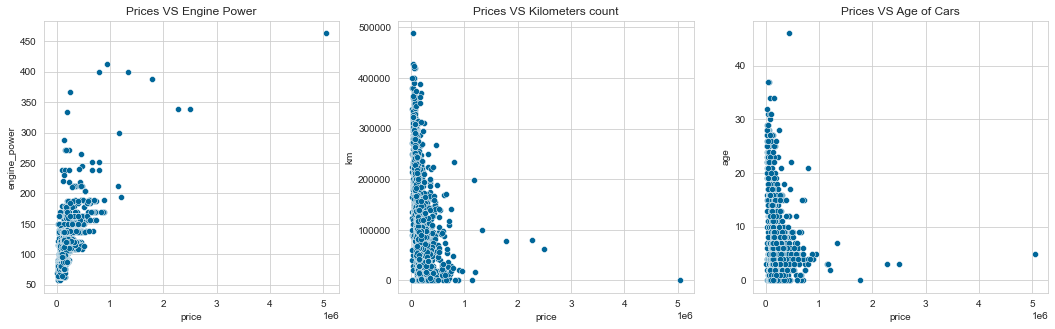

In [140]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='price', y='engine_power', data=df, color='#006699')
plt.title('Prices VS Engine Power')
plt.subplot(1, 3, 2)
sns.scatterplot(x='price', y='km', data=df, color='#006699')
plt.title('Prices VS Kilometers count')
plt.subplot(1, 3, 3)
sns.scatterplot(x='price', y='age', data=df, color='#006699')
plt.title('Prices VS Age of Cars')
plt.show()

- Dari Engine Power terlihat mobil-mobil yang memiliki engine power yang tinggi cenderung memiliki harga yang sangat tinggi juga, dimana cukup banyak harga-harga mobil yang diatas 1 juta liras(mata uang turki) memiliki engine power yang tinggi
- Dari jumlah kilometer yang telah ditempuh oleh mobil, juga memiliki sedikit kecenderungan dimana kilometer yang tinggi juga mempengaruhi harga yang rendah sehingga korelasi pada kolom ini bernilai minus(-)
- Sama halnya dengan kilometer, semakin bertambahnya umur terdapat kecenderungan harga pada mobil juga semakin rendah

In [141]:
desc = df.describe()
desc.iloc[1:] = desc.iloc[1:].applymap('{:.2f}'.format)

print(desc.loc[:,'price'])

count        2314.0
mean      174575.74
std       173513.09
min        11750.00
25%       102562.50
50%       141625.00
75%       193000.00
max      5050000.00
Name: price, dtype: object


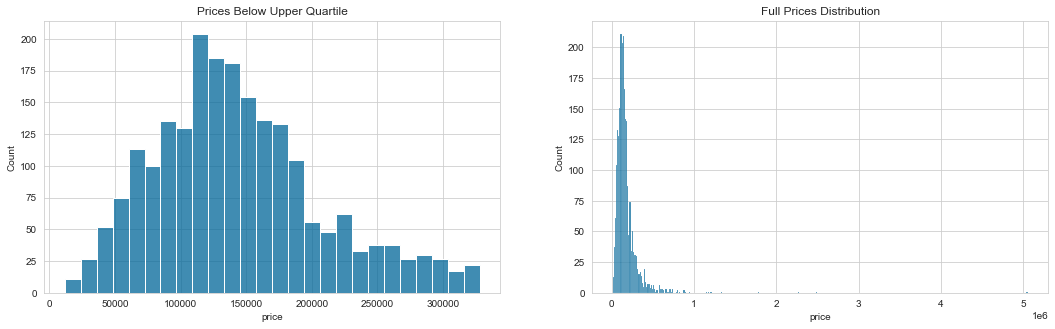

In [142]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)

plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
upper = df['price'].quantile(0.75) + 1.5 * IQR
sns.histplot(x='price', data=df[(df['price']<=upper)], color='#006699')
plt.title('Prices Below Upper Quartile')

plt.subplot(1, 2, 2)
upper = df['price'].quantile(0.75) + 1.5 * IQR
sns.histplot(x='price', data=df, color='#006699')
plt.title('Full Prices Distribution')
plt.show()

- Mayoritas harga berada pada kisaran 100k-200k Lira, dimana jumlah mobil yang terdaftar di website penjualan kian semakin sedikit dengan bertambahnya harga pada mobil yang ditawarkan

#### 4.4.3. Which Brands Is Listed More In Websites

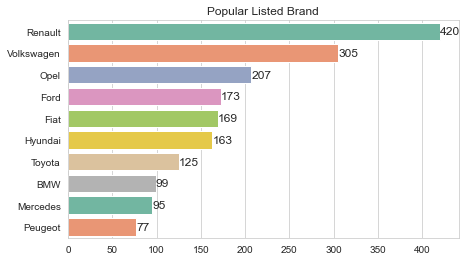

In [143]:
plt.figure(figsize=(7,4))
ax = sns.barplot(x=df['brand'].value_counts().head(10).values ,y=df['brand'].value_counts().head(10).index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Popular Listed Brand')
plt.show()

- Merk Renault merupakan merek mobil yang paling banyak terdaftar pada website penjualan mobil bekas ini. Merk ini terdaftar hingga 418 mobil dengan pilihan berbagai model
- Kedua diikuti oleh Volkswagen sebanyak 304 mobil kemudian ketiga diikuti oleh Opel sebanyak 206 mobil
- Jika diperhatikan 3 mobil diatas adalah mobil yang berbasis produksi di Eropa, hal ini mungkin dikarenakan faktor letak geografis dari Turki yang berada di area kawasan Eurasia

#### 4.4.4. Which Model Is Popular In Websites

In [144]:
topbrand_model = df.loc[df['model'].value_counts().head(25)].groupby('brand').count().loc[:,'model']

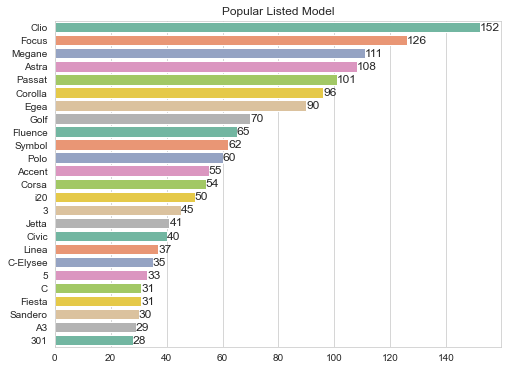

========================= Top Brand Comparison vs TOP 25 Model From Each Brand =========================


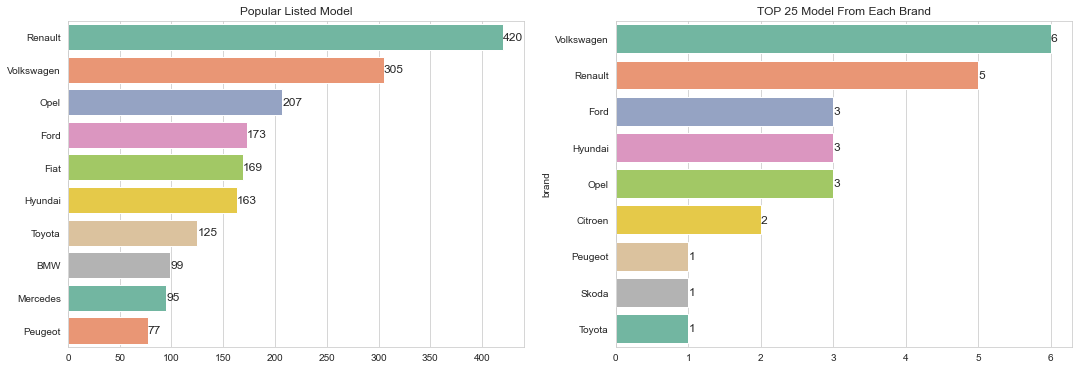

In [145]:
plt.figure(figsize=(8,6))

ax = sns.barplot(x=df['model'].value_counts().head(25).values ,y=df['model'].value_counts().head(25).index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Popular Listed Model')
plt.show()
print('='*25,'Top Brand Comparison vs TOP 25 Model From Each Brand','='*25)

plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
ax = sns.barplot(x=df['brand'].value_counts().head(10).values ,y=df['brand'].value_counts().head(10).index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Popular Listed Model')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=topbrand_model.values ,y=topbrand_model.index, order=topbrand_model.sort_values(ascending=False).index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('TOP 25 Model From Each Brand')

plt.show()


- Model Clio milik merek Renault terdaftar paling banyak diantara model lainnya hingga 150 daftar penjualan
- Kemudian diikuti oleh Focus milik merk Ford yang ternyata tidak terdapat dalam top 3 daftar penjualan berdasarkan merk. Dimana Focus memiliki hingga 126 daftar penjualan
- Selanjutnya model Megane yang ternyata milik merek Renault lagi sebanyak 111 daftar penjualan

#### 4.4.5. How Many Cars That Modified Their Parts

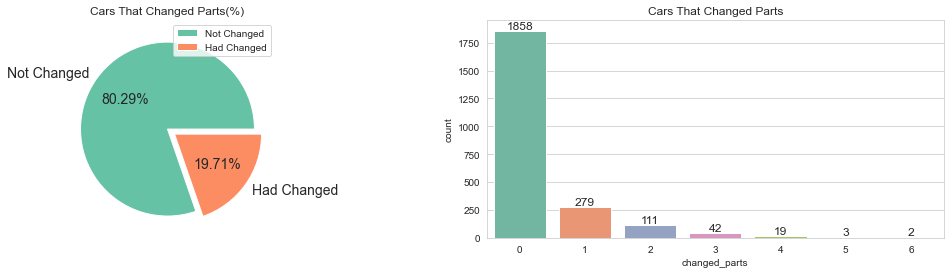

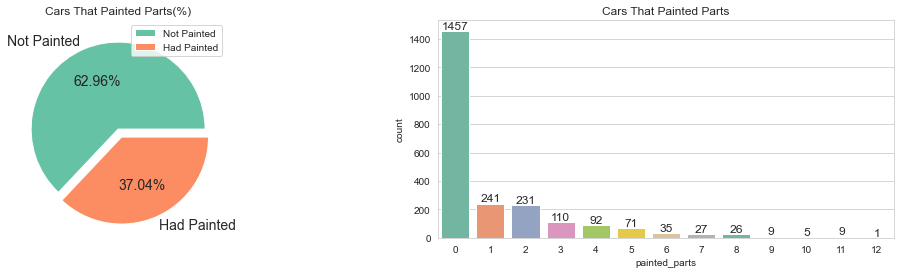

In [146]:
df_changed_parts = df.copy()
df_changed_parts['changed_parts'] = np.where(df_changed_parts['changed_parts'] >0, 'Had Changed', 'Not Changed')
df_changed_parts['painted_parts'] = np.where(df_changed_parts['painted_parts'] >0, 'Had Painted', 'Not Painted')
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.pie(df_changed_parts.value_counts('changed_parts') , labels= df_changed_parts.value_counts('changed_parts').index, explode=(0, 0.1),colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Cars That Changed Parts(%)')
plt.legend()

plt.subplot(1,2,2)
ax = sns.countplot(data=df ,x='changed_parts', palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Cars That Changed Parts')

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.pie(df_changed_parts.value_counts('painted_parts') , labels= df_changed_parts.value_counts('painted_parts').index, explode=(0, 0.1),colors = colors, autopct='%.2f%%', textprops={'fontsize': 14})
plt.title('Cars That Painted Parts(%)')
plt.legend()

plt.subplot(1,2,2)
ax = sns.countplot(data=df ,x='painted_parts', palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Cars That Painted Parts')

plt.show()


- Sebanyak 1850 atau 80.30% dari total daftar penjualan mobil yang masih belum memiliki perubahan ataupun modifikasi pada bagian mobilnya
- Sedangkan sebanyak 278 atau 12.07% yang telah melakukannya sebanyak satu kali
- Selebihnya kurang lebih 7.6% yang telah mengganti bagian mobilnya lebih daru satu kali

#### 4.4.6. Is Modified Parts(Changed and Painted) Really Not Affecting The Prices?

##### A. General Cars

In [147]:
df.describe()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts,price
count,2314.000000,2314.000000,2314.000000,2314.000000,2314.000000,2314.000000,2.314000e+03
mean,7.012100,1487.899741,110.096802,121193.769231,0.315471,1.125756,1.745757e+05
std,6.106762,283.804973,33.485169,83891.614042,0.755927,1.992030,1.735131e+05
min,0.000000,900.000000,57.000000,0.000000,0.000000,0.000000,1.175000e+04
25%,3.000000,1400.000000,90.000000,57000.000000,0.000000,0.000000,1.025625e+05
50%,5.000000,1500.000000,105.000000,106000.000000,0.000000,0.000000,1.416250e+05
75%,9.000000,1600.000000,120.000000,174000.000000,0.000000,2.000000,1.930000e+05
max,46.000000,5500.000000,463.000000,488000.000000,6.000000,12.000000,5.050000e+06


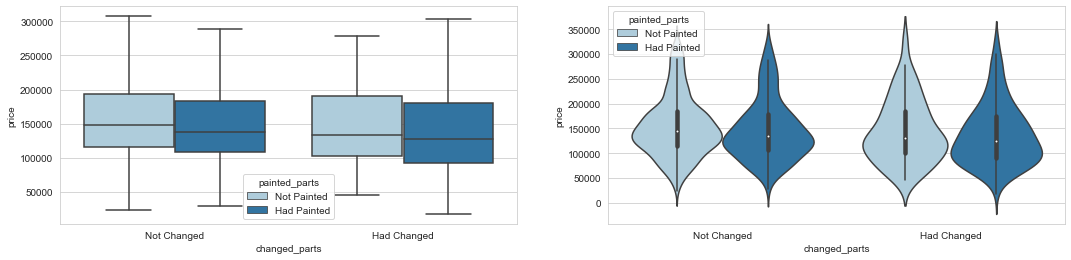

In [148]:
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)
df_changed_parts_outliers = df_changed_parts['price'].quantile(0.75) + iqr_price*1.5
dfa_outl = df_changed_parts['age'].quantile(0.75) + ((df_changed_parts['age'].quantile(0.75) - df_changed_parts['age'].quantile(0.25))*1.5)
dfep_outl = df_changed_parts['engine_power'].quantile(0.75) + ((df_changed_parts['engine_power'].quantile(0.75) - df_changed_parts['engine_power'].quantile(0.25))*1.5)
dfkm_outl = df_changed_parts['km'].quantile(0.75) + ((df_changed_parts['km'].quantile(0.75) - df_changed_parts['km'].quantile(0.25))*1.5)
df_changed_painted_parts= df_changed_parts.query('age <= @dfa_outl and engine_power <=@dfep_outl and km <= @dfkm_outl')
df_changed_painted_parts.reset_index(drop=True, inplace=True)
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
sns.boxplot(x='changed_parts', y='price', data=df_changed_painted_parts, showfliers=False, hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)

plt.subplot(1, 2, 2)
sns.violinplot(x='changed_parts', y='price', data=df_changed_painted_parts[(df_changed_painted_parts['price']<=df_changed_parts_outliers)], hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)
plt.show()

- Dari keseluruhan mobil tanpa memandang brand atau merek apapun, Didapatkan informasi bahwa:
    - Mobil yang tidak pernah dimodifikasi sama sekali, cenderung memiliki harga yang sedikit lebih tinggi dibandingkan mobil sudah pernah dimodifikasi baik part mobilnya diganti ataupun dicat
    - Terdapat kecenderungan juga dimana mobil yang setidaknya telah diganti part-nya (plot kanan) baik telah dicat ataupun tidak menaruh harga yang sedikit lebih rendah dibandingkan yang tidak pernah diganti sama sekali part mobilnya
    - Mobil yang telah dicat tampaknya juga memiliki harga yang cenderung lebih rendah jika dibandingkan belum di cat sama sekali meskipun part-nya telah diganti ataupun belum diganti sama sekali

In [149]:
modified_parts_pivot = df_changed_painted_parts.pivot_table(index=['changed_parts', 'painted_parts'], values='price', aggfunc='mean')
modified_parts_pivot.style.format({'price':'{0:,.2f} Lira'}).bar(color='#d65f5f', align='mid')

- Dari Tabel diatas terlihat bahwa rata-rata yang dipatok pada mobil yang sama sekali belum dimodifikasi, memiliki rata-rata tertinggi
- Kemudian diikuti oleh yang sudah diganti part-nya dengan belum di cat meskipun kategori ini hanya selisih tipis dengan yang belum diganti part-nya namun sudah dicat
- Terakhir ditempati oleh yang sudah diganti part-nya dan juga sudah di cat

##### B. What About The Cars That Actually Have Been Modified For The Most?

In [150]:
df_changed_parts.query('changed_parts!="Not Changed" or painted_parts!="Not Painted"').groupby(['brand', 'model']).count().sort_values('age', ascending=False).iloc[:,0:1].head(5).rename(columns=dict(age="jumlah"))

,,jumlah
brand,model,
Opel,Astra,65
Ford,Focus,59
Renault,Clio,59
Toyota,Corolla,47
Renault,Fluence,36


In [151]:
df_changed_painted_parts

,brand,model,age,fuel_type,gear_type,engine_capacity,engine_power,km,changed_parts,painted_parts,price
0,Renault,Fluence,8,Dizel,Otomatik,1500,110,217000,Not Changed,Had Painted,128000
1,Opel,Corsa,8,Dizel,Manuel,1200,75,108000,Had Changed,Had Painted,90000
2,Ford,Focus,9,Dizel,Manuel,1600,110,98420,Not Changed,Not Painted,130500
3,Toyota,Corolla,3,Benzin,Manuel,1300,99,78000,Not Changed,Had Painted,154000
4,Opel,Corsa,10,Dizel,Manuel,1200,75,125000,Not Changed,Had Painted,100000
...,...,...,...,...,...,...,...,...,...,...,...
2035,Hyundai,Accent,5,Dizel,Otomatik,1600,75,27550,Not Changed,Not Painted,145750
2036,Renault,Clio,1,Dizel,Manuel,1500,122,17000,Not Changed,Had Painted,271500
2037,Dacia,Sandero,1,Dizel,Manuel,1500,120,81500,Not Changed,Not Painted,186500
2038,Toyota,Corolla,0,Benzin,Otomatik,1800,112,15285,Not Changed,Not Painted,145900


In [152]:
top_model_list = ['Astra', 'Focus', 'Clio', 'Corolla', 'Fluence']
for i,row in enumerate(df_changed_painted_parts.itertuples()):
    if df_changed_painted_parts.loc[i, 'model'] in top_model_list:
        df_changed_painted_parts.loc[i, 'top_model'] = True
    else:
        df_changed_painted_parts.loc[i, 'top_model'] = False

df_top_modified_model = df_changed_painted_parts.query('top_model==True')


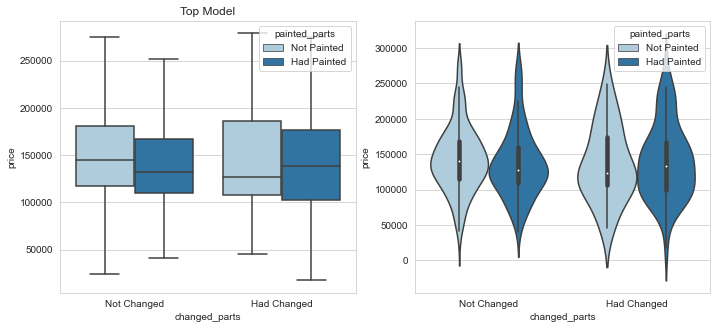

========================= All Model =========================


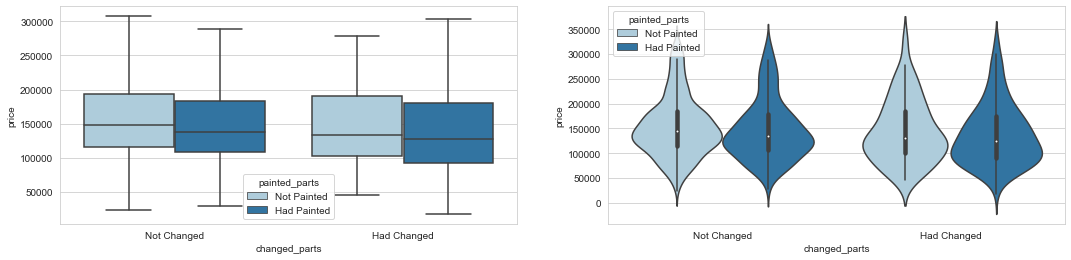

In [153]:
iqr_price = df_top_modified_model['price'].quantile(0.75) - df_top_modified_model['price'].quantile(0.25)
df_top_modified_outliers = df_top_modified_model['price'].quantile(0.75) + iqr_price*1.5
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='changed_parts', y='price', data=df_top_modified_model, showfliers=False, hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)
plt.title('Top Model')
plt.subplot(1, 3, 2)
sns.violinplot(x='changed_parts', y='price', data=df_top_modified_model[(df_top_modified_model['price']<=df_top_modified_outliers)], hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)
# sns.histplot(x='price', hue='changed_parts', data=df_top_modified_model[(df_top_modified_model['price']<=df_top_modified_outliers)])
plt.show()
print('='*25,'All Model','='*25)
plt.figure(figsize=(18,4))
plt.subplot(1, 2, 1)
sns.boxplot(x='changed_parts', y='price', data=df_changed_painted_parts, showfliers=False, hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)

plt.subplot(1, 2, 2)
sns.violinplot(x='changed_parts', y='price', data=df_changed_painted_parts[(df_changed_painted_parts['price']<=df_changed_parts_outliers)], hue='painted_parts', hue_order=['Not Painted', 'Had Painted'], palette=colors2)
plt.show()

- Dari hasil visual yang ditampilkan, terlihat untuk mobil top modified model, memiliki pola penentuan harga yang sama jika dibandingkan dengan pola penentuan harga pada keseluruhan model mobil

In [154]:
top_modified_parts_pivot = df_top_modified_model.pivot_table(index=['changed_parts', 'painted_parts'], values='price', aggfunc='mean')
top_modified_parts_pivot.style.format({'price':'{0:,.2f} Lira'}).bar(color='#d65f5f', align='mid')

- Begitupun juga dengan harga rata-rata yang dipatok oleh para penjual mobil ini, pola hampir mirip meskipun terdapat perbedaan dimana justru pada segmen mobil ini, mobil yang telah dicat dan dimodifikasi(diganti part dan telah dicat) memiliki harga rata-rata yang justru lebih tinggi dibandingkan dengan yang belum diganti partn=ya ataupun sudah diganti namun belum di cat mobilnya

In [155]:
modified_parts_pivot = df_changed_painted_parts.pivot_table(index=['changed_parts', 'painted_parts'], values='price', aggfunc='mean')
modified_parts_pivot.style.format({'price':'{0:,.2f} Lira'}).bar(color='#d65f5f', align='mid')

- Dengan hasil yang kita dapatkan ini, kita akan menarik sebuah asumsi dimana, `mobil yang telah dimodifikasi baik yang telah diganti part-nya ataupun yang telah di cat cenderung akan memberikan harga yang lebih rendah jika dibandingkan dengan tidak pernah dimodifikasi sama sekali`

#### 4.4.7. Let's Prepare Some Data For Specific Requirements

In [156]:
df_testing = df.query('model=="Astra" and engine_capacity==1600 and engine_power==115 and fuel_type=="Gasoline"').head(1)
df_testing

,brand,model,age,fuel_type,gear_type,engine_capacity,engine_power,km,changed_parts,painted_parts,price


## **5. Data Preprocessing**

### 5.1 Renaming Value

- Untuk memudahkan penggunaan istilah, maka penamaan yang awalnya menggunakan basis nama dari negara asalnya yaitu turki, akan diubah ke dalam bentuk bahasa inggris

In [157]:
df['fuel_type'] = df['fuel_type'].replace({'Dizel': 'Diesel', 'Benzin': 'Gasoline'})
df['gear_type'] = df['gear_type'].replace({'Manuel': 'Manual', 'Otomatik': 'Automatic'})

In [158]:
# df['changed_parts'] = np.where(df['changed_parts'] >0, 'Had Changed', 'Not Changed')
# df['painted_parts'] = np.where(df['painted_parts'] >0, 'Had Painted', 'Not Painted')

In [159]:
df.head()

,brand,model,age,fuel_type,gear_type,engine_capacity,engine_power,km,changed_parts,painted_parts,price
0,Renault,Fluence,8,Diesel,Automatic,1500,110,217000,0,4,128000
1,Opel,Corsa,8,Diesel,Manual,1200,75,108000,2,2,90000
2,Mercedes,E,8,Diesel,Automatic,3000,265,155000,1,1,450000
3,Ford,Focus,9,Diesel,Manual,1600,110,98420,0,0,130500
4,Toyota,Corolla,3,Gasoline,Manual,1300,99,78000,0,1,154000


### 5.2. Set Data Inference

- Kita akan mengambil sampel secara acak dari dataset utama, yang nantinya akan dijadikan sebagai dataset `inference` atau dataset asing. Hal ini berguna agar pada tahap pengujian `inference` kita dapat mengetahui apakah model juga sudah cukup baik menentukan apakah nasabah akan berlangganan `deposito berjangka` dengan nilai parameter/variabel yang belum pernah `dikenal` sebelumnya.

In [160]:
df_inf = df.sample(10, random_state=40)

In [161]:
df = df.drop(df_inf.index)

In [162]:
# reset index

df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### 5.3 Split Dataset

In [163]:
X = df.drop('price', axis=1)
y = df['price']

#### 5.3.1 Split into Data Train and Dataset

In [164]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)

#### 5.3.2 Checking Data and Column Distributions

In [165]:
preprocess_handling = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')

In [166]:
preprocess_handling

,columns,skew,status
0,age,1.496360,Skewed
1,engine_capacity,4.796550,Skewed
2,engine_power,3.293209,Skewed
3,km,0.749897,Skewed
4,changed_parts,2.926438,Skewed
5,painted_parts,2.254903,Skewed


- Pendistribusian data tiap kolom fitur akan digunakan sebagai acuan saat memperlakukan kolom dalam tahap `handling outlier`

In [167]:
X_train.describe()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,7.004341,1489.690722,110.504612,119028.936517,0.308193,1.105263
std,6.060497,293.897509,34.247223,82531.354334,0.740831,1.953251
min,0.000000,900.000000,57.000000,0.000000,0.000000,0.000000
25%,3.000000,1400.000000,90.000000,55379.000000,0.000000,0.000000
50%,5.000000,1500.000000,107.000000,104302.000000,0.000000,0.000000
75%,9.000000,1600.000000,120.000000,170000.000000,0.000000,2.000000
max,46.000000,5500.000000,463.000000,420000.000000,6.000000,11.000000


In [168]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('='*50)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'engine_capacity', 'engine_power', 'km', 'changed_parts', 'painted_parts']
Categorical Columns:  ['brand', 'model', 'fuel_type', 'gear_type']


### 5.4 Handling Outliers

- Fungsi untuk menangani baik kolom yang terdistribusi `normal` dan juga kolom yang terdistribusi `skewed`

In [169]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary
    
# Since it's skewed, we are using IQR to handle outliers

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

- Fungsi untuk menampilkan visual pendistrbusian data tiap-tiap kolom fitur baik sebelum ditangani maupun setelah ditangani `outlier`-nya 

In [170]:

# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_trim[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

#### 5.4.1 Detect Outliers
- Sebelum melakukan penanganan pada `outliers`, alangkah baiknya kita check terlebih dahulu apakah kolom tersebut memiliki `outlier` dan seberapa banyak `outlier` tersebut dibandingkan dengan total keseluruhan data yang terdapat pada data `Training`.

In [171]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if preprocess_handling['status'].loc[(preprocess_handling['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk age:(-6.0, 18.0)
Batas lower dan upper untuk engine_capacity:(1100.0, 1900.0)
Batas lower dan upper untuk engine_power:(45.0, 165.0)
Batas lower dan upper untuk km:(-116552.5, 341931.5)
Batas lower dan upper untuk changed_parts:(0.0, 0.0)
Batas lower dan upper untuk painted_parts:(-3.0, 5.0)


- Pada proses handling outlier ini, saya menetapkan sikap bahwa:
    - `Trimming`: Jika outlier dibawah 5%
    - `Capping`: Jika outlier berada direntang 5-15%
    - `Keep`: Jika outlier berada di atas 15%

- Khusus pada kolom `changed_parts` terlepas seberapa banyak persentase outlier-nya kita akan tetap membiarkan kolom ini
- Hal ini dikarenakan pada kolom ini outlier yang terdeteksi batas atas maupun bawah sama-sama bernilai 0, ini akan sangat berdampak pada data mobil lainnya yang memiliki nilai diatas dari outlier ini sehingga pada pengujian data test nanti, model akan tidak cukup mengenali data mobil yang memiliki nilai selain dari 0

In [172]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_trimmed_sim = X_train.loc[~outliers[k]]
    preprocess_handling.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_trimmed_sim.shape[0]
    preprocess_handling.loc[i,'percentage'] = np.round(100-(X_train_trimmed_sim.shape[0]/X_train.shape[0]*100), 2)
    preprocess_handling.loc[i,'action'] = np.where(preprocess_handling.loc[i,'percentage']>15, 'Keep', 
                                        np.where(preprocess_handling.loc[i,'percentage']>5, 'Capping', np.where(preprocess_handling.loc[i,'percentage']>0, 'Trim', 'None')))


preprocess_handling.loc[4,'action'] = "Keep"

In [173]:
preprocess_handling

,columns,skew,status,trimmed_row,percentage,action
0,age,1.496360,Skewed,124.0,6.73,Capping
1,engine_capacity,4.796550,Skewed,126.0,6.84,Capping
2,engine_power,3.293209,Skewed,89.0,4.83,Trim
3,km,0.749897,Skewed,24.0,1.30,Trim
4,changed_parts,2.926438,Skewed,355.0,19.26,Keep
5,painted_parts,2.254903,Skewed,82.0,4.45,Trim


- Dari rangkuman hasil pendeteksian `outlier`, kita mendapatkan informasi bahwa:
    - Terdapat satu kolom yang memiliki persentase outlier yang tinggi, hingga 19.53% pada kolom `changed_parts`
    - Terdapat tiga kolom yang memenuhi kriteria untuk `capping` dan dua kolom untuk `trimming`

#### 5.4.2 Handling Outliers

##### A. Trimming Outliers

In [174]:
found=0

for i, (k, v) in enumerate(outliers.items()):
    if preprocess_handling.loc[i,'action']=='Trim' and found==0:
        outliers_tot = outliers[k]
        found=1
    if preprocess_handling.loc[i,'action']=='Trim' and found==1:
        outliers_tot += outliers[k]

In [175]:
if found!=0:
    X_train_trimmed = X_train.loc[~outliers_tot]
    y_train_trimmed = y_train.loc[~outliers_tot]
else:
    X_train_trimmed = X_train.copy()
    y_train_trimmed = y_train.copy()

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 1843
Jumlah baris pada X_train SETELAH di Trimming: 1659
% Outlier dari Keseluruhan Data: 9.98%


In [176]:
# Reset Index

X_train_trimmed.reset_index(drop=True, inplace=True)

##### B. Capping Outliers

In [177]:
cap_columns = []
# Create the capper
for i,row in enumerate(preprocess_handling.itertuples()):
    if preprocess_handling.loc[i,'action']=='Capping':
        cap_columns.append(preprocess_handling.loc[i,'columns'])

if cap_columns:
    windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                            tail='both', # cap left, right or both tails 
                            fold=1.5,
                            variables=cap_columns,
                            missing_values='ignore')

    windsoriser.fit(X_train_trimmed)

    X_train_capped = windsoriser.transform(X_train_trimmed)
else:
    X_train_capped = X_train_trimmed.copy()


##### C. Handling Outliers Result

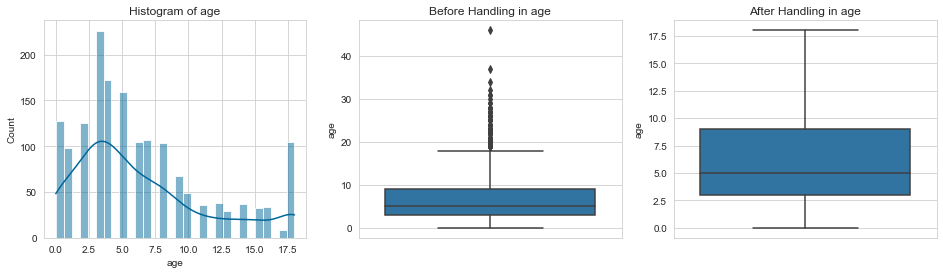

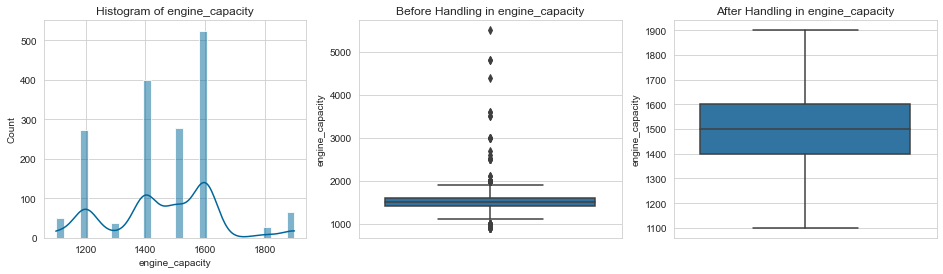

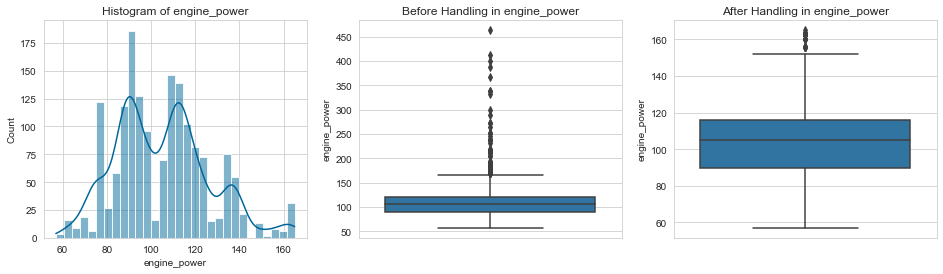

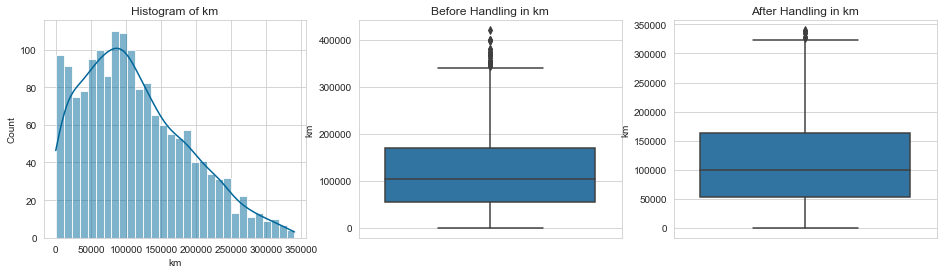

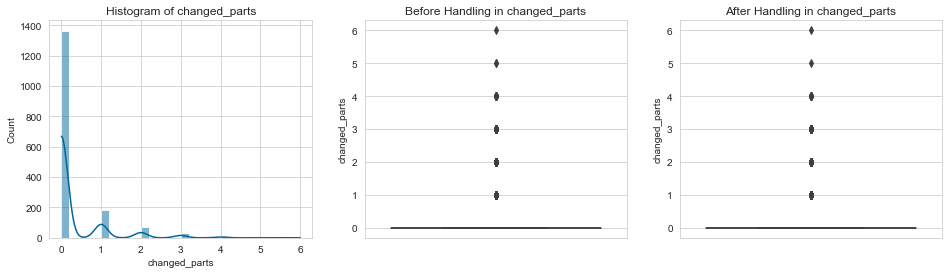

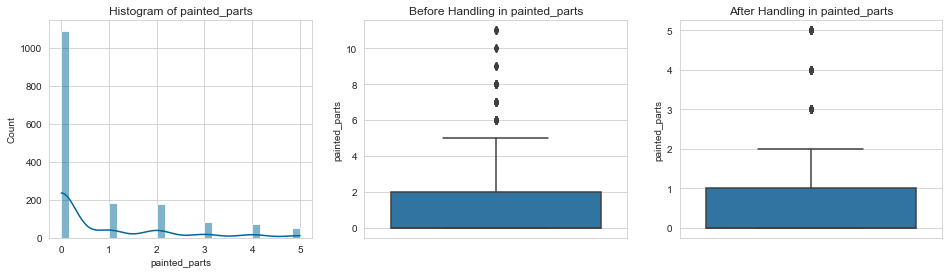

In [178]:
for i in X_train_capped.describe().columns:
    diagnostic_plots(X_train, X_train_capped, i)

- Setelah melalui tahap handling outlier, beberapa kolom masih memiliki outlier seperti km, engine power namun jumlah yang dimiliki sudah sangat banyak berkurang
- Sedangkan pada changed parts dikarenakan tidak dilakukan penanganan, maka tidak terjadi perubahan pada tahap ini

In [179]:
X_train_capped.describe()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,6.395419,1461.965039,105.077155,112629.078963,0.283906,0.810729
std,5.016655,180.820396,21.145001,75407.241436,0.716546,1.354653
min,0.000000,1100.000000,57.000000,0.000000,0.000000,0.000000
25%,3.000000,1400.000000,90.000000,53950.000000,0.000000,0.000000
50%,5.000000,1500.000000,105.000000,100000.000000,0.000000,0.000000
75%,9.000000,1600.000000,116.000000,162500.000000,0.000000,1.000000
max,18.000000,1900.000000,165.000000,340000.000000,6.000000,5.000000


### 5.5 Handling Missing Value

- Tidak ditemukannya `missing value`, oleh karena itu kita akan melewati tahap ini

In [180]:
X_train_capped.isnull().sum().sum()

0

### 5.6 Handling High Cardinality

- Seperti yang telah dijelaskan sebelumnya pada tahap EDA, ditemukannya daftar merek/brand yang hanya terdaftar sekali di website penjualan
- Maka kita akan pastikan bahwa data mobil tersebut tidak termasuk dalam Test set agar tidak mengakibatkan error pada tahap feature encoding
- Data mobil yang terdeteksi pada test set akan kita hapus untuk menyederhanakan data yang akan kita gunakan dalam permodelan machine learning

In [181]:
brand_name_train = X_train_capped['brand'].unique().tolist()
model_name_train = X_train_capped['model'].unique().tolist()
brand_name_test = X_test['brand'].unique().tolist()
model_name_test = X_test['model'].unique().tolist()
# X_test['brand'][(X_test['brand'].isin(brand_name_train))==False]

In [182]:
print("Brand yang hanya terdapat pada Test set: ",X_test['brand'][(X_test['brand'].isin(brand_name_train))==False].shape[0])

Brand yang hanya terdapat pada Test set:  0


In [183]:
print("Model yang hanya terdapat pada Test set: ",X_test['model'][(X_test['model'].isin(model_name_train))==False].shape[0])

Model yang hanya terdapat pada Test set:  13


In [184]:
for i in brand_name_test:
    if i not in brand_name_train:
        brand_ind = X_test[X_test['brand']==i].index
        X_test= X_test.drop(brand_ind)
        y_test= y_test.drop(brand_ind)

for i in model_name_test:
    if i not in model_name_train:
        model_ind = X_test[X_test['model']==i].index
        X_test = X_test.drop(model_ind)
        y_test = y_test.drop(model_ind)

In [185]:
X_test['brand'][(X_test['brand'].isin(brand_name_train))==False]

Series([], Name: brand, dtype: object)

In [186]:
X_test['model'][(X_test['model'].isin(model_name_train))==False]

Series([], Name: model, dtype: object)

- Setelah melalui tahap ini sudah tidak ditemukannya lagi merk ataupun model yang hanya terdapat pada Test set

### 5.6 Feature Selection

In [187]:
X_train_capped.corr()

,age,engine_capacity,engine_power,km,changed_parts,painted_parts
age,1.000000,0.195580,-0.102769,0.444978,0.166236,0.194912
engine_capacity,0.195580,1.000000,0.178375,0.137216,0.026601,0.069085
engine_power,-0.102769,0.178375,1.000000,-0.108314,-0.025888,0.008806
km,0.444978,0.137216,-0.108314,1.000000,0.119834,0.106546
changed_parts,0.166236,0.026601,-0.025888,0.119834,1.000000,0.300829
painted_parts,0.194912,0.069085,0.008806,0.106546,0.300829,1.000000


In [188]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_capped[num_columns].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_capped[num_columns].values, i)
                          for i in range(len(X_train_capped[num_columns].columns))]

In [189]:
vif_data

,feature,VIF
0,age,3.494201
1,engine_capacity,27.978308
2,engine_power,22.800991
3,km,4.044768
4,changed_parts,1.291946
5,painted_parts,1.532911


- Kita hanya akan sekedar melihat nilai `collinearity` antar kolom dimana hanya kolom `engine_capacity` dan `engine_power` saja yang memiliki keterkaitan erat satu sama lain
- Kolom lainnya bersifat independen atau mewakili parameter dari masing-masing kolom itu sendiri

In [190]:
# X_train_capped.drop(['brand'], axis=1, inplace=True)
# X_test.drop(['brand'], axis=1, inplace=True)
# cat_columns.remove('brand')
# X_train_capped.drop(['model'], axis=1, inplace=True)
# X_test.drop(['model'], axis=1, inplace=True)
# cat_columns.remove('model')

### 5.7 Feature Scaling & Encoding

#### 5.7.1 Splitting Columns (Numerical and Categorical)

In [191]:
from sklearn.compose import ColumnTransformer

In [192]:
# Split on X_train

X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### 5.7.2 Feature Scaling

In [193]:
# Feature Scaling Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [194]:
cat_brand = X_train_capped['brand'].value_counts().sort_values(ascending=True).index.tolist()

#### 5.7.3 Feature Encoding

- Seperti yang telah dijelaskan pada tahap EDA, kita akan memilih asumsi bahwa mobil yang paling banyak terdaftar berarti memiliki bias/favorit oleh pembeli sehingga mobil ini lebih baik diantara mobil lainnya
- Sehingga kolom kategorik lainya yang merupakan bagian dari spesifikasi mobil tersebut, mengikuti asumsi dari kategori ataupun kolom ini

In [195]:
# Feature Encoding

from sklearn.preprocessing import OrdinalEncoder

cat_brand = X_train_capped['brand'].value_counts().sort_values(ascending=True).index.tolist()
cat_model= X_train_capped['model'].value_counts().sort_values(ascending=True).index.tolist()
cat_fuel = X_train_capped['fuel_type'].value_counts().sort_values(ascending=True).index.tolist()
cat_gear = X_train_capped['gear_type'].value_counts().sort_values(ascending=True).index.tolist()
# cat_changed = X_train_capped['changed_parts'].value_counts().sort_values(ascending=True).index.tolist()
# cat_painted = X_train_capped['painted_parts'].value_counts().sort_values(ascending=True).index.tolist()

encoder = OrdinalEncoder(categories=[cat_brand, cat_model, cat_fuel, cat_gear])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


In [196]:
# # Feature Encoding

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoder.fit(X_train_cat)

# X_train_cat_encoded = encoder.transform(X_train_cat)
# X_test_cat_encoded = encoder.transform(X_test_cat)


#### 5.7.4 Concatenate Numerical & Categorical

In [197]:
# Concate Data

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

## **6. Model Definition**

In [198]:
lin_reg = LinearRegression()

## 7. Model Training

In [199]:
# Train

lin_reg.fit(X_train_final, y_train_trimmed)

LinearRegression()

## **8. Model Evaluation**

### 8.1. Base Model

In [200]:
evaluation_metrics = pd.DataFrame({'Model':[], 'Details' : [], 'MAE(Train)': [], 'RMSE(Train)': [], 'R2 Score(Train)': [], 'MAE(Test)': [], 'RMSE(Test)': [], 'R2 Score(Test)': []})

In [201]:
# Model Evaluation

# Predict Error on Train-Set and Test-Set
y_pred_train_lin_reg = lin_reg.predict(X_train_final)
y_pred_test_lin_reg = lin_reg.predict(X_test_final)

# Evaluation of Error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_lin_reg)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_lin_reg, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_lin_reg)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_lin_reg)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_lin_reg, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_lin_reg)
i = evaluation_metrics.shape[0]
evaluation_metrics.loc[i] = ['Linear Regression', 'Original, All features', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]

print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)


MAE Train-set: 41991.90509140038
RMSE Train-Set: 59119.7391854706
R2 Score Train-Set: 0.5416280991100018
MAE Train-set: 45994.832115979996
RMSE Test-Set:  73633.69409997904
R2 Score Test-set:  0.5380817050429998


In [202]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha=0.1, fit_intercept=True)
ridge_reg.fit(X_train_final, y_train_trimmed)

y_pred_train_ridge = ridge_reg.predict(X_train_final)
y_pred_test_ridge = ridge_reg.predict(X_test_final)

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_ridge)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_ridge, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_ridge)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_ridge)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_ridge, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_ridge)
evaluation_metrics.loc[i+1] = ['Linear with Ridge', 'All features, ridge for regularization', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]
print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)

MAE Train-set: 41991.39098380912
RMSE Train-Set: 59119.73935962949
R2 Score Train-Set: 0.5416280964093965
MAE Train-set: 45994.3196406493
RMSE Test-Set:  73633.78083809861
R2 Score Test-set:  0.5380806167926169


In [203]:
lasso_reg = Lasso(alpha=0.1, fit_intercept=True)
lasso_reg.fit(X_train_final, y_train_trimmed)

y_pred_train_lasso = lasso_reg.predict(X_train_final)
y_pred_test_lasso = lasso_reg.predict(X_test_final)

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_lasso)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_lasso, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_lasso)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_lasso)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_lasso, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_lasso)
evaluation_metrics.loc[i+2] = ['Linear with Lasso', 'All features, Lasso for regularization', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]
print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)

MAE Train-set: 41991.88290289406
RMSE Train-Set: 59119.73918689233
R2 Score Train-Set: 0.5416280990879557
MAE Train-set: 45994.80650258232
RMSE Test-Set:  73633.69494599174
R2 Score Test-set:  0.5380816944285998


In [204]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_final)
X_test_poly = poly.transform(X_test_final)

poly_reg = Lasso(alpha=1,fit_intercept=True)
poly_reg.fit(X_train_poly, y_train_trimmed)

y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_poly)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_poly, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_poly)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_poly)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_poly, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_poly)
evaluation_metrics.loc[i+3] = ['Linear with Polynomial Features', 'All Features, degree=2 for Polynomial', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]

print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Sert:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-str: ', r2_model1_test)

MAE Train-set: 38422.8337175759
RMSE Train-Set: 55742.14853833931
R2 Score Train-Sert: 0.5925067902663574
MAE Train-set: 44824.914787980444
RMSE Test-Set:  69811.7216477545
R2 Score Test-str:  0.5847891608451768


/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+12, tolerance: 1.265e+09
  model = cd_fast.enet_coordinate_descent(


In [205]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 5)

In [206]:
xgb_reg.fit(X_train_final, y_train_trimmed)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [207]:
# Model Evaluation

# Predict Error on Train-Set and Test-Set
y_pred_train_xgb = xgb_reg.predict(X_train_final)
y_pred_test_xgb = xgb_reg.predict(X_test_final)

# Evaluation of Error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_xgb)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_xgb, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_xgb)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_xgb, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_xgb)
evaluation_metrics.loc[i+4] = ['XGBoost Regression', 'Original, All features', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]

print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)


MAE Train-set: 36043.676093231996
RMSE Train-Set: 54301.349141059814
R2 Score Train-Set: 0.6132999682818894
MAE Train-set: 44129.35768345424
RMSE Test-Set:  76552.76860858835
R2 Score Test-set:  0.5007319330868425


In [208]:
evaluation_metrics

,Model,Details,MAE(Train),RMSE(Train),R2 Score(Train),MAE(Test),RMSE(Test),R2 Score(Test)
0,Linear Regression,"Original, All features",41991.905091,59119.739185,0.541628,45994.832116,73633.694100,0.538082
1,Linear with Ridge,"All features, ridge for regularization",41991.390984,59119.739360,0.541628,45994.319641,73633.780838,0.538081
2,Linear with Lasso,"All features, Lasso for regularization",41991.882903,59119.739187,0.541628,45994.806503,73633.694946,0.538082
3,Linear with Polynomial Features,"All Features, degree=2 for Polynomial",38422.833718,55742.148538,0.592507,44824.914788,69811.721648,0.584789
4,XGBoost Regression,"Original, All features",36043.676093,54301.349141,0.613300,44129.357683,76552.768609,0.500732


### 8.2. Model Improvement

#### 8.2.2. Hyperparameter List For Tuning

In [209]:
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'fit_intercept': [True, False],
                'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
param_lasso = {'alpha': [1, 10, 100, 1000, 5000, 8000, 10000],
                'fit_intercept': [True, False]}
param_xgb = {'n_estimators': [120, 130],
            'max_depth': [1, 2],
            'learning_rate': [0.01, 0.08],
            'subsample': [0.7],
            'colsample_bytree': [0.8],
            }



#### 8.2.1 Hyperparameter Tuning With GridSearchCV

##### A. Ridge Regularization

In [210]:
from sklearn.model_selection import GridSearchCV

In [211]:
ridge_grid = GridSearchCV(ridge_reg, param_grid=param_ridge, cv=5, scoring='neg_mean_absolute_error') 
ridge_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_absolute_error')

In [212]:
ridge_grid.best_params_

{'alpha': 100, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [213]:
ridge_best= ridge_grid.best_estimator_
ridge_best

Ridge(alpha=100, solver='sparse_cg')

In [214]:
y_pred_train_tuning_ridge = ridge_best.predict(X_train_final)
y_pred_test_tuning_ridge = ridge_best.predict(X_test_final)
print('MAE Train-set:', mean_absolute_error(y_train_trimmed, y_pred_train_tuning_ridge))

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_tuning_ridge)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_tuning_ridge, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_tuning_ridge)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_tuning_ridge)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_tuning_ridge, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_tuning_ridge)
evaluation_metrics.loc[i+5] = ['Ridge Tuned', 'All features, Ridge(alpha=100, solver="svd")', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]
print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)


MAE Train-set: 41593.54577557957
MAE Train-set: 41593.54577557957
RMSE Train-Set: 59244.79577904366
R2 Score Train-Set: 0.5396868504960056
MAE Train-set: 45543.31451906094
RMSE Test-Set:  73846.43507984316
R2 Score Test-set:  0.5354087192524137


##### B. Lasso Regularization

In [215]:
lasso_grid = GridSearchCV(lasso_reg, param_grid=param_lasso, cv=5, scoring='neg_mean_absolute_error') 
lasso_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [1, 10, 100, 1000, 5000, 8000, 10000],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [216]:
lasso_best= lasso_grid.best_estimator_
lasso_best

Lasso(alpha=8000)

In [217]:
y_pred_train_tuning_lasso = lasso_best.predict(X_train_final)
y_pred_test_tuning_lasso = lasso_best.predict(X_test_final)

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_tuning_lasso)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_tuning_lasso, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_tuning_lasso)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_tuning_lasso)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_tuning_lasso, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_tuning_lasso)
evaluation_metrics.loc[i+6] = ['Lasso Tuned', 'All features, Lasso(alpha=5000)', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]
print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)


MAE Train-set: 41751.48218239121
RMSE Train-Set: 60927.94458796659
R2 Score Train-Set: 0.5131602591697209
MAE Train-set: 45716.10657106476
RMSE Test-Set:  75898.66954196387
R2 Score Test-set:  0.5092273958482672


##### C. XGBoost Regression

In [218]:
xgb_grid = GridSearchCV(xgb_reg, param_grid=param_xgb, cv=3, scoring='neg_mean_absolute_error') 
xgb_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=5, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
        

In [219]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.08,
 'max_depth': 2,
 'n_estimators': 120,
 'subsample': 0.7}

In [220]:
xgb_best= xgb_grid.best_estimator_
xgb_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
y_pred_train_tuning_xgb = xgb_best.predict(X_train_final)
y_pred_test_tuning_xgb = xgb_best.predict(X_test_final)

mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_tuning_xgb)
rmse_model1_train = mean_squared_error(y_train_trimmed, y_pred_train_tuning_xgb, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_tuning_xgb)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_tuning_xgb)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_tuning_xgb, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_tuning_xgb)
evaluation_metrics.loc[i+7] = ['XGBoost Reg Tuned', 'All features, colsample_bytree: 0.7, learning_rate: 0.05, max_depth: 2, n_estimators: 120, subsample: 0.8', mae_model1_train, rmse_model1_train, r2_model1_train, mae_model1_test, rmse_model1_test, r2_model1_test]
print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)



MAE Train-set: 33283.26920867239
RMSE Train-Set: 48758.19114169808
R2 Score Train-Set: 0.6882200817279378
MAE Train-set: 36900.90526471819
RMSE Test-Set:  62775.19036472244
R2 Score Test-set:  0.6642716142634475


### 8.3. Choosing The Best Model

- Setelah melalui berbagai tahap evaluasi dari berbagai model baik model dasar ataupun model yang telah di-tuning
- Kita akan memilih salah satu yang paling terbaik diantara-nya dengan skor metrik yang digunakan ialah `Mean Absolute Error` atau MAE
- Pemilihan metrik ini dikarenakan kita akan melihat model mana yang memiliki rata-rata selisih harga yang paling rendah dari harga yang seharusnya dari keseluruhan saat prediksi train set ataupun pada test set
- Model ini juga tidak mengkuadratkan selisih, sehingga jarak error/selisih pada `MAE` tidak akan terlalu jauh jika dibandingkan dengan hasil `RMSE`. Jika kita kembali ke atas pada saat melihat statistika deskriptif khususnya pada kolom `price`, Q3-Q4 pada model ini perbedaan nilainya sangat berbanding jauh sekali dengan nilai IQR-nya. Sehingga harga-harga mobil yang sangat mahal cenderung akan menghasilkan selisih harga yang tinggi juga dan tentunya memberikan dampak pada harga-harga yang jauh berada di bawahnya dimana kebetulan mobil-mobil ini menjadi bagian mayoritas dari daftar penjualan mobil

In [222]:
evaluation_metrics

,Model,Details,MAE(Train),RMSE(Train),R2 Score(Train),MAE(Test),RMSE(Test),R2 Score(Test)
0,Linear Regression,"Original, All features",41991.905091,59119.739185,0.541628,45994.832116,73633.694100,0.538082
1,Linear with Ridge,"All features, ridge for regularization",41991.390984,59119.739360,0.541628,45994.319641,73633.780838,0.538081
2,Linear with Lasso,"All features, Lasso for regularization",41991.882903,59119.739187,0.541628,45994.806503,73633.694946,0.538082
3,Linear with Polynomial Features,"All Features, degree=2 for Polynomial",38422.833718,55742.148538,0.592507,44824.914788,69811.721648,0.584789
4,XGBoost Regression,"Original, All features",36043.676093,54301.349141,0.613300,44129.357683,76552.768609,0.500732
5,Ridge Tuned,"All features, Ridge(alpha=100, solver=""svd"")",41593.545776,59244.795779,0.539687,45543.314519,73846.435080,0.535409
6,Lasso Tuned,"All features, Lasso(alpha=5000)",41751.482182,60927.944588,0.513160,45716.106571,75898.669542,0.509227
7,XGBoost Reg Tuned,"All features, colsample_bytree: 0.7, learning_...",33283.269209,48758.191142,0.688220,36900.905265,62775.190365,0.664272


- XGBoost yang telah dituning hyperparameternya dipilih sebagai model terbaik dan akan digunakan saat penggunaan prediksi data inference baik pada pengerjaan notebook ini maupun pada masukkkan informasi dari pengguna saat mengakses web prediksi harga mobil bekas
- Ini dikarenakan nilai MAE yang dihasilkan baik pada prediksi  Train set ataupun Test set lebih rendah dibandingkan dengan model lainnya
- Nilai MAE yang dihasilkan pada model ini adalah 32474 untuk Train set dan 39701 untuk Test set
- Selisih antara Train set ataupun Test set berkisar 4000-an terbilang tidak terlalu jauh jika kita berpatokan pada nilai central tendency ataupun measure of variability pada Train maupun Test set

In [223]:
y_train_trimmed.describe()

count      1659.000000
mean     159761.467752
std       87348.297786
min       20000.000000
25%      105825.000000
50%      142000.000000
75%      189000.000000
max      740000.000000
Name: price, dtype: float64

In [224]:
y_test.describe()

count       448.000000
mean     163140.178571
std      108462.410645
min       17500.000000
25%      100000.000000
50%      138375.000000
75%      189187.500000
max      875900.000000
Name: price, dtype: float64

### 8.4. Build Pipeline

- Pipeline akan digunakan untuk membungkus tahapan yang sekiranya dilakukan pada proses prediksi untuk data inference(data yang berada diluar dari tahapan train ataupun evaluasi model)
- Tahapan tersebut berarti akan dimulai dari tahap Feaure scaling & Encoding kemudian dilanjutkan ke tahap prediksi model machine learning
- Tahapan Pipeline kemudian akan disimpan ke dalam file .pkl agar nantinya bisa digunakan diluar dari file notebook ini sekaligus memprediksi harga berdasarkan masukkan/input dari pengguna melalui website prediksi harga mobil bekas yang nantinya akan dibuat

In [225]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(categories=[cat_brand, cat_model, cat_fuel, cat_gear]))

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Final pipeline
pipe_xgb_reg = make_pipeline(data_pipeline, xgb_best)

In [226]:

pipe_xgb_reg.fit(X_train_capped, y_train_trimmed)

# Predict Error on Train-Set and Test-Set
y_pred_train_lin_reg_pipe = pipe_xgb_reg.predict(X_train_capped)
y_pred_test_lin_reg_pipe = pipe_xgb_reg.predict(X_test)

# Evaluation of Error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_model1_train = mean_absolute_error(y_train_trimmed, y_pred_train_lin_reg_pipe)
rmse_model1_train =mean_squared_error(y_train_trimmed, y_pred_train_lin_reg_pipe, squared=False)
r2_model1_train =r2_score(y_train_trimmed, y_pred_train_lin_reg_pipe)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_lin_reg_pipe)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_lin_reg_pipe, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_lin_reg_pipe)

print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)



MAE Train-set: 33283.26920867239
RMSE Train-Set: 48758.19114169808
R2 Score Train-Set: 0.6882200817279378
MAE Train-set: 36900.90526471819
RMSE Test-Set:  62775.19036472244
R2 Score Test-set:  0.6642716142634475


- Simpan hasil pipeline kedalam file .pkl

In [227]:
with open("full_pipe.pkl", "wb") as f:
    pickle.dump(pipe_xgb_reg, f)

## **9. Model Inference**

In [228]:
df_inf.isnull().sum().sum()

0

- Sebelum diaplikasikan lansung menggunakan file python yang khusus menangani masukkan dari user, kita akan menguji coba pipeline yang tersimpan dari file .pkl yang telah kita buat sebelumnya

In [229]:
with open("full_pipe.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [230]:
y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['predicted_price'])

In [231]:
# Concate to Original Dataframe
df_inf_result = pd.concat([df_inf, y_pred_inf], axis=1)

In [232]:
df_inf

,brand,model,age,fuel_type,gear_type,engine_capacity,engine_power,km,changed_parts,painted_parts,price
0,Renault,Clio,1,Diesel,Manual,1500,152,79000,0,0,278000
1,Skoda,Octavia,3,Diesel,Automatic,1600,100,219000,0,0,59900
2,Skoda,Fabia,5,Gasoline,Automatic,1200,83,230000,0,0,57000
3,Opel,Astra,9,Diesel,Manual,1200,90,145000,0,0,145500
4,Volkswagen,Golf,5,Gasoline,Manual,1400,122,120000,2,5,199900
5,Renault,Clio,6,Gasoline,Manual,1100,75,145000,1,0,110000
6,Mercedes,C,5,Gasoline,Automatic,1400,93,119694,0,0,128000
7,Volvo,V40,0,Diesel,Automatic,1800,113,17805,0,0,301500
8,BMW,1,6,Diesel,Manual,2000,105,165000,0,0,219000
9,Fiat,Egea,1,Diesel,Manual,1200,75,134000,0,0,134000


In [233]:
df_inf_result.loc[:,['brand', 'model', 'engine_capacity', 'km', 'price', 'predicted_price']]

,brand,model,engine_capacity,km,price,predicted_price
0,Renault,Clio,1500,79000,278000,323330.468750
1,Skoda,Octavia,1600,219000,59900,99496.109375
2,Skoda,Fabia,1200,230000,57000,86437.882812
3,Opel,Astra,1200,145000,145500,116818.382812
4,Volkswagen,Golf,1400,120000,199900,176025.953125
5,Renault,Clio,1100,145000,110000,101956.414062
6,Mercedes,C,1400,119694,128000,144441.453125
7,Volvo,V40,1800,17805,301500,266124.437500
8,BMW,1,2000,165000,219000,136319.359375
9,Fiat,Egea,1200,134000,134000,108865.695312


- Ternyata pipeline yang berada di dalam file `full_pipe.pkl` berjalan dengan baik dan menghasilkan prediksi pada sampel data inference
- Sehingga file ini sudah siap untuk digunakan secara external

In [234]:
new_data =['Renault', 'Clio', 1, 'Diesel', 'Manual', 1500, 152, 79000, 0, 0]
columns = X_train_capped.columns
new_data = pd.DataFrame([new_data], columns=columns)
pipeline.predict(new_data)

array([323330.47], dtype=float32)

<hr>

## **10. Conclusions**

In [235]:
evaluation_metrics.style.format({'MAE(Train)': '{:.2f}', 'RMSE(Train)': '{:.2f}', 'R2 Score(Train)': '{:.4f}', 'MAE(Test)': '{:.2f}', 'RMSE(Test)': '{:.2f}', 'R2 Score(Test)': '{:.4f}'})

,Model,Details,MAE(Train),RMSE(Train),R2 Score(Train),MAE(Test),RMSE(Test),R2 Score(Test)
0,Linear Regression,"Original, All features",41991.91,59119.74,0.5416,45994.83,73633.69,0.5381
1,Linear with Ridge,"All features, ridge for regularization",41991.39,59119.74,0.5416,45994.32,73633.78,0.5381
2,Linear with Lasso,"All features, Lasso for regularization",41991.88,59119.74,0.5416,45994.81,73633.69,0.5381
3,Linear with Polynomial Features,"All Features, degree=2 for Polynomial",38422.83,55742.15,0.5925,44824.91,69811.72,0.5848
4,XGBoost Regression,"Original, All features",36043.68,54301.35,0.6133,44129.36,76552.77,0.5007
5,Ridge Tuned,"All features, Ridge(alpha=100, solver=""svd"")",41593.55,59244.80,0.5397,45543.31,73846.44,0.5354
6,Lasso Tuned,"All features, Lasso(alpha=5000)",41751.48,60927.94,0.5132,45716.11,75898.67,0.5092
7,XGBoost Reg Tuned,"All features, colsample_bytree: 0.7, learning_rate: 0.05, max_depth: 2, n_estimators: 120, subsample: 0.8",33283.27,48758.19,0.6882,36900.91,62775.19,0.6643


- Dari hasil evaluasi model baik model dasar ataupun yang telah di-tuning, kita dapat tarik kesimpulan bahwa:
    - Model masih belum mencukupi standar `Goodfit` jika kita berpatokan pada nilai r2-nya dimana umumnya model yang good fit berada di atas 0.80++
    - Namun keseluruhan model kecuali base XGBoost tidak mengalami `overfitting`, dimana selisih baik MAE yang menjadi faktor penilaian utama kita maupun r2 skor tidak terlalu jauh
    - Model XGBoost yang telah ditemukan hyperparameternya yaitu `colsample_bytree: 0.7, learning_rate: 0.05, max_depth: 2, n_estimators: 120, subsample: 0.8` menjadi model terbaik dimana menghasilkan nilai MAE 32474 untuk Train dan 39701 untuk Test set
    - Model XGboost tuned akan digunakan sebagai basis prediksi harga melalui input atau masukkan user dari website yang nantinya akan kita kembangkan yang sebelumnya telah dibuat pipeline dan simpan dalam bentuk file `full_pipe.pkl` agar bisa digunakan secara external



- Dari sisi dataset:
    - Sampel yang digunakan masih dianggap kurang cukup untuk memenuhi kebutuhan permodelan machine learning ini
    - Alangkah lebih baiknya, dataset dihimpun dari daftar pada tahun-tahun sebelumnya ataupun dari berbagai situs jual beli mobil bekas yang berada di wilayah turki. Dengan hal ini diharapkan permodelan machine learning semakin mengenal lebih baik karakteristik mobil yang akan dijual dan dapat memmberikan saran ataupun prediksi harga yang jauh lebih baik

- Saran untuk tahap pengembangan selanjutnya:
    - Pada pasar mobil, pada dasarnya terdapat segmentasi pasar yang juga turut mempengaruhi harga-harga mobil baik baru maupun bekas. 
    - Kedepannya akan lebih baik jika dibuat lebih dari satu model machine learning dalam memprediksi harga berdasarkan segmentasi tersebut. Dimana sistem awalnya mampu mendeteksi mobil mana yang masuk ke segmentasi apa, kemudian digunakan permodelan prediksi harga yang telah disesuaikan, sehingga selisih harga yang dihasilkan model machine learning diharapkan mampu meminimalkan selisih harga yang diprediksi
    - Namun hal ini juga tentu membutuhkan bahan data yang jauh lebih banyak dari apa yang telah ada saat ini

<hr>

# **4. Extras**

In [236]:
# dfa_q1 = df_changed_parts['age'].quantile(0.25)
# dfa_q3 = df_changed_parts['age'].quantile(0.75)
# dfep_q1 = df_changed_parts['engine_power'].quantile(0.25)
# dfep_q3 = df_changed_parts['engine_power'].quantile(0.75)
# dfkm_q1 = df_changed_parts['km'].quantile(0.25)
# # dfkm_q3 = df_changed_parts['km'].quantile(0.75)
# df_changed_painted_parts = df_changed_parts.query('age>=@dfa_q1 and age<=@dfa_q3 and engine_power>=@dfep_q1 and engine_power<=@dfep_q3 and km>=@dfkm_q1 and km<=@dfkm_q3')

In [237]:
# df['brand'] = df['brand'].replace('Tofa�', 'Tofas')
# # df['model'] = df['model'].replace('�ahin', 'Sahin')
# # df['model'] = df['model'].replace('Do�an', 'Dogan')